In [5]:
import networkx as nx
G = nx.Graph()
G = nx.Graph(day="Friday")
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [6]:
import matplotlib.pyplot as plt

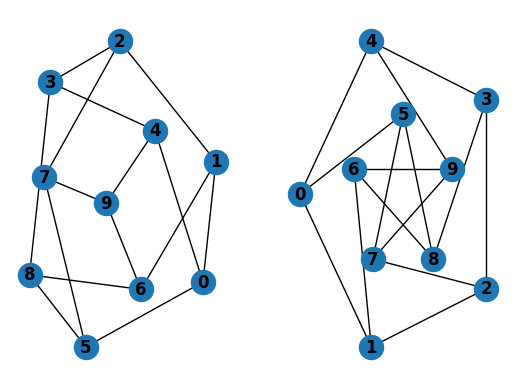

In [7]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

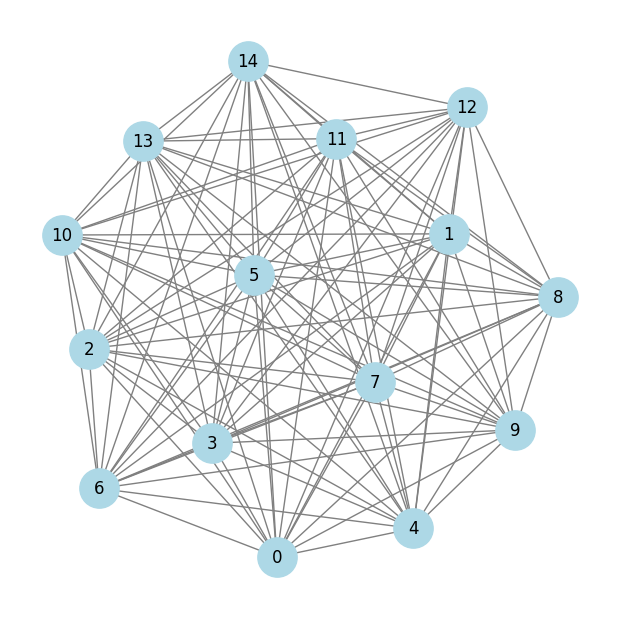

In [ ]:
G = nx.complete_graph(15)
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.show()

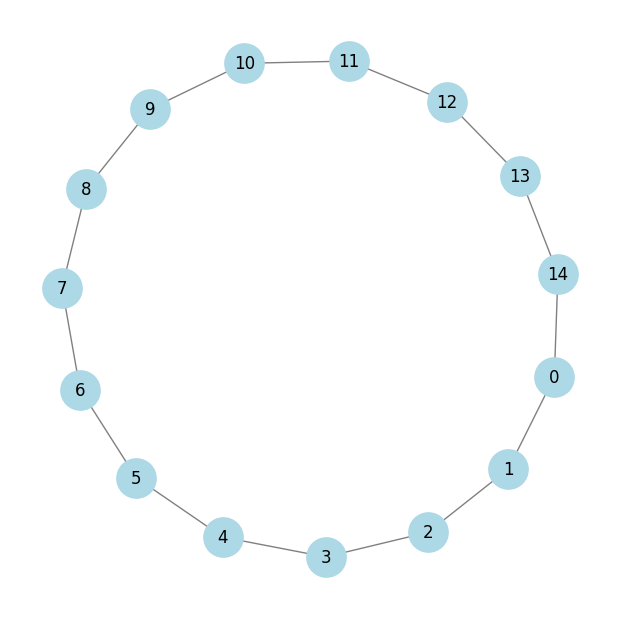

In [13]:
G = nx.cycle_graph(15)
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.show()

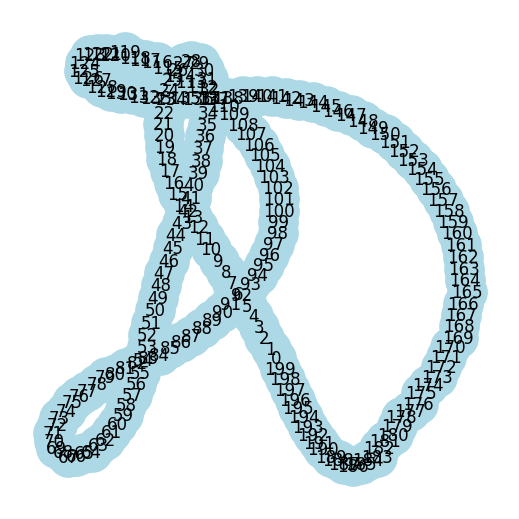

In [27]:
G = nx.circulant_graph(200, [1, 2, 3, 4])
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.show()

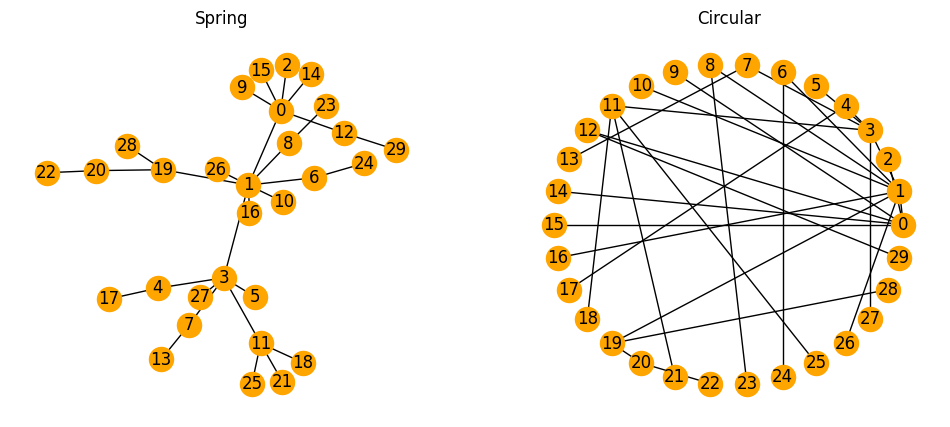

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(30, 1)

layouts = {
    "Spring": nx.spring_layout(G),
    "Circular": nx.circular_layout(G),
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, (name, pos) in zip(axes, layouts.items()):
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=300, node_color='orange')
    ax.set_title(name)

plt.show()

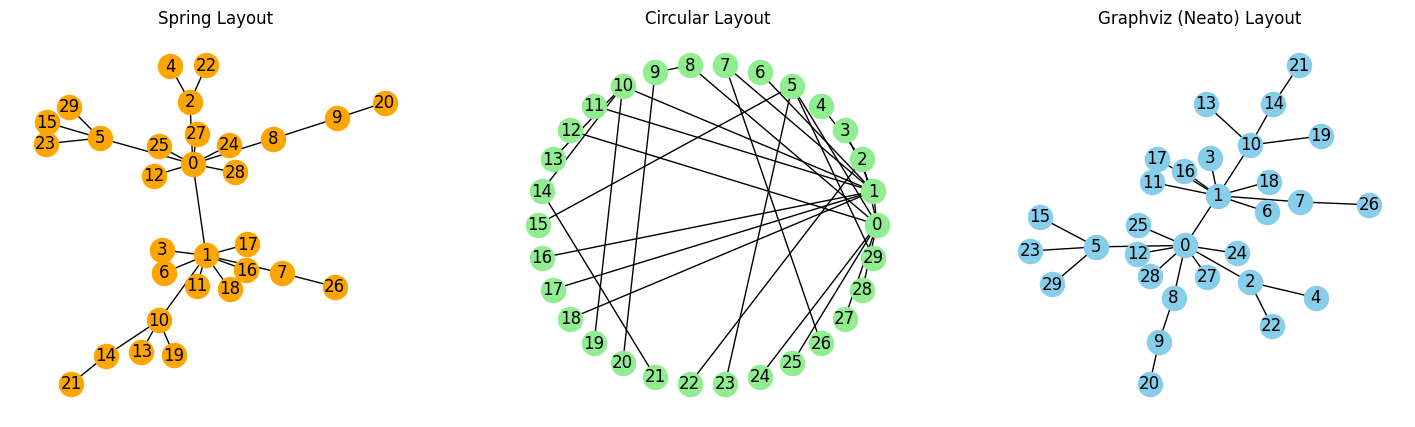

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a Barabasi-Albert graph (30 nodes, each new node attaches to 1 existing node)
G = nx.barabasi_albert_graph(30, 1)

# 2. Define the layouts
# We use try/except for Graphviz because it fails if the software isn't installed
pos_spring = nx.spring_layout(G)
pos_circular = nx.circular_layout(G)

try:
    import pydot
    from networkx.drawing.nx_pydot import graphviz_layout
    pos_graphviz = graphviz_layout(G, prog="neato")
    has_graphviz = True
except ImportError:
    has_graphviz = False
    print("Graphviz or Pydot not found. Skipping third layout.")

# 3. Plotting
fig, axes = plt.subplots(1, 3 if has_graphviz else 2, figsize=(18, 5))

# Spring Layout
nx.draw(G, pos_spring, ax=axes[0], with_labels=True, node_color='orange', node_size=300)
axes[0].set_title("Spring Layout")

# Circular Layout
nx.draw(G, pos_circular, ax=axes[1], with_labels=True, node_color='lightgreen', node_size=300)
axes[1].set_title("Circular Layout")

# Graphviz Neato Layout
if has_graphviz:
    nx.draw(G, pos_graphviz, ax=axes[2], with_labels=True, node_color='skyblue', node_size=300)
    axes[2].set_title("Graphviz (Neato) Layout")

plt.show()

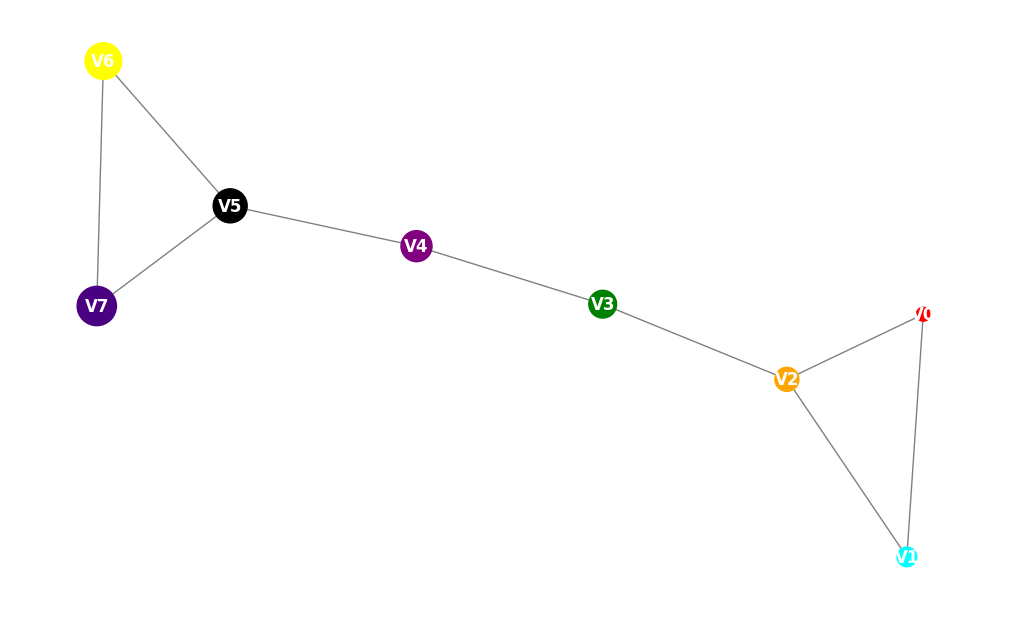

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a barbell: two 5-node bells connected by a 3-node path
G = nx.barbell_graph(3, 2)

# 2. Define individual sizes and colors
# We will create a list for sizes and a list for colors
node_sizes = []
node_colors = ["red", "cyan", "orange", "green", "purple", "black", "yellow", "indigo"]

num = 100
for node in G.nodes():
    # Example logic: make the 'bells' larger than the 'bar'
    # Nodes 0-4 and 8-12 are the bells in this specific graph
    node_sizes.append(num)
    num += 100

# 3. Create custom labels
# You can pass a dictionary {node_id: "label_text"}
custom_labels = {node: f"V{node}" for node in G.nodes()}

# 4. Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)

nx.draw(G, pos, 
        labels=custom_labels,
        node_size=node_sizes, 
        node_color=node_colors, 
        with_labels=True,
        font_color="white",
        font_weight="bold",
        edge_color="gray")

plt.show()